Эпоха 1/20, Ошибка: 6047.4701, Точность: 0.8981
Эпоха 2/20, Ошибка: 5093.1303, Точность: 0.9057
Эпоха 3/20, Ошибка: 4891.0661, Точность: 0.9093
Эпоха 4/20, Ошибка: 4777.9680, Точность: 0.9114
Эпоха 5/20, Ошибка: 4701.3935, Точность: 0.9133
Эпоха 6/20, Ошибка: 4644.4111, Точность: 0.9144
Эпоха 7/20, Ошибка: 4599.1678, Точность: 0.9147
Эпоха 8/20, Ошибка: 4561.8564, Точность: 0.9146
Эпоха 9/20, Ошибка: 4530.2366, Точность: 0.9145
Эпоха 10/20, Ошибка: 4502.8814, Точность: 0.9151
Эпоха 11/20, Ошибка: 4478.8104, Точность: 0.9151
Эпоха 12/20, Ошибка: 4457.3282, Точность: 0.9153
Эпоха 13/20, Ошибка: 4437.9762, Точность: 0.9152
Эпоха 14/20, Ошибка: 4420.4260, Точность: 0.9149
Эпоха 15/20, Ошибка: 4404.3956, Точность: 0.9147
Эпоха 16/20, Ошибка: 4389.6456, Точность: 0.9151
Эпоха 17/20, Ошибка: 4375.9821, Точность: 0.9155
Эпоха 18/20, Ошибка: 4363.2492, Точность: 0.9160
Эпоха 19/20, Ошибка: 4351.3214, Точность: 0.9166
Эпоха 20/20, Ошибка: 4340.0938, Точность: 0.9162
Финальная точность: 0.9162


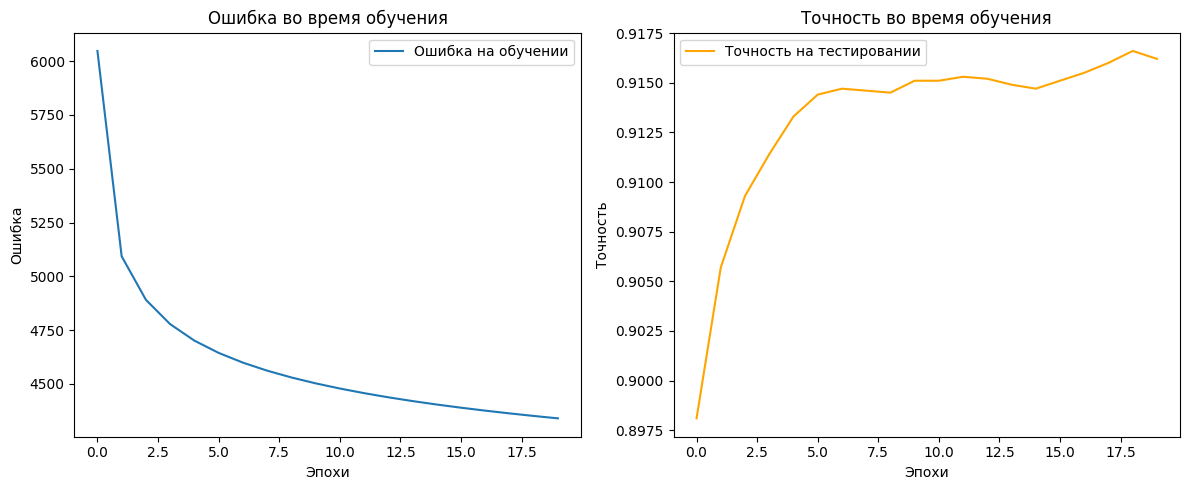

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Функция активации (сигмоида)
def sigmoid(x):
    """Сигмоидная функция активации."""
    return 1 / (1 + np.exp(-x))

# Производная функции активации (сигмоида)
def sigmoid_derivative(x):
    """Производная сигмоидной функции."""
    return sigmoid(x) * (1 - sigmoid(x))

# Подготовка данных
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Нормализация данных: преобразуем значения пикселей из диапазона [0, 255] в [0, 1]
x_train = x_train / 255.0
x_test = x_test / 255.0

# Преобразование меток в категориальный формат (one-hot encoding)
num_classes = 10  # Количество классов (цифры от 0 до 9)
y_train = np.eye(num_classes)[y_train]  # Преобразуем метки в one-hot формат
y_test = np.eye(num_classes)[y_test]

# Преобразование изображений в векторы: каждое изображение становится одномерным массивом
x_train = x_train.reshape(x_train.shape[0], -1)  # Преобразуем векторы размером (60000, 28*28)
x_test = x_test.reshape(x_test.shape[0], -1)      # Преобразуем векторы размером (10000, 28*28)

# Инициализация весов и смещений
np.random.seed(42)  # Устанавливаем семя для воспроизводимости результатов
input_dim = x_train.shape[1]  # Размер входного слоя (784 для изображений 28x28)
output_dim = num_classes        # Размер выходного слоя (10 для классов от 0 до 9)

# Инициализируем веса и смещения небольшими случайными значениями
weights = np.random.randn(input_dim, output_dim) * 0.01
biases = np.random.randn(output_dim) * 0.01

# Параметры обучения
learning_rate = 0.1   # Скорость обучения
epochs = 20           # Количество эпох обучения

# Списки для хранения значений ошибок и точности на тестовых данных
training_errors = []
test_accuracies = []

# Обучение модели
for epoch in range(epochs):
    total_error = 0   # Суммарная ошибка за эпоху

    for i in range(x_train.shape[0]):
        # Входные данные и целевые значения для текущего примера
        X = x_train[i]   # Входные данные (изображение)
        D = y_train[i]   # Целевое значение (метка)

        # Вычисление выходов нейронов: линейная комбинация входов и весов + смещения
        net = np.dot(X, weights) + biases
        Y = sigmoid(net)   # Применяем сигмоидную функцию активации

        # Вычисление ошибки: разница между целевым значением и предсказанием
        error = D - Y
        total_error += np.sum(error**2) / 2   # Суммируем квадраты ошибок

        # Обновление весов и смещений с использованием градиентного спуска
        delta = error * sigmoid_derivative(net)   # Вычисляем градиент ошибки
        weights += learning_rate * np.outer(X, delta)   # Обновляем веса
        biases += learning_rate * delta   # Обновляем смещения

    # Сохранение ошибки на текущей эпохе для анализа позже
    training_errors.append(total_error)

    # Оценка модели на тестовых данных после каждой эпохи
    correct_predictions = 0

    for i in range(x_test.shape[0]):
        X = x_test[i]     # Входные данные для теста
        D = y_test[i]     # Целевое значение для теста

        net = np.dot(X, weights) + biases   # Вычисляем выходы нейронов на тестовых данных
        Y = sigmoid(net)                     # Применяем сигмоидную функцию активации

        if np.argmax(Y) == np.argmax(D):    # Проверяем правильность предсказания
            correct_predictions += 1         # Увеличиваем счетчик правильных предсказаний

    accuracy = correct_predictions / x_test.shape[0]   # Вычисляем точность на тестовых данных
    test_accuracies.append(accuracy)

    print(f'Эпоха {epoch+1}/{epochs}, Ошибка: {total_error:.4f}, Точность: {accuracy:.4f}')

# Финальная оценка модели на тестовых данных после завершения всех эпох обучения
correct_predictions_final = sum(np.argmax(sigmoid(np.dot(x_test, weights) + biases), axis=1) == np.argmax(y_test, axis=1))
final_accuracy = correct_predictions_final / x_test.shape[0]
print(f'Финальная точность: {final_accuracy:.4f}')

# Визуализация результатов обучения

# График изменения ошибки во время обучения
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(training_errors, label='Ошибка на обучении')
plt.title('Ошибка во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.legend()

# График изменения точности во время обучения
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Точность на тестировании', color='orange')
plt.title('Точность во время обучения')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()

plt.tight_layout()
plt.show()